In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv('bank1.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [52]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [53]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [54]:
data['y']=np.where(data['y'] =='no', '0', data['y'])
data['y']=np.where(data['y'] =='yes', '1', data['y'])

In [57]:
data['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [58]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [59]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [61]:
categories_col = [n for n in data.columns if data[n].dtypes == 'object']
for column in categories_col:
    print(column, '\n')
    print(data[column].value_counts())
    print("------------------------------------------------------------------")

job 

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
------------------------------------------------------------------
marital 

married     2797
single      1196
divorced     528
Name: marital, dtype: int64
------------------------------------------------------------------
education 

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
------------------------------------------------------------------
default 

no     4445
yes      76
Name: default, dtype: int64
------------------------------------------------------------------
housing 

yes    2559
no     1962
Name: housing, dtype: int64
------------------------------------------------------------------
loan 

no     3830
yes     691
Name: loan, dtype: int64


In [62]:
data['default']=np.where(data['default'] =='no', 0, data['default'])
data['default']=np.where(data['default'] =='yes', 1, data['default'])

In [63]:
data['housing']=np.where(data['housing'] =='no', 0, data['housing'])
data['housing']=np.where(data['housing'] =='yes', 1, data['housing'])

In [64]:
data['loan']=np.where(data['loan'] =='no', 0, data['loan'])
data['loan']=np.where(data['loan'] =='yes', 1, data['loan'])

In [65]:
data = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

In [66]:
data.shape

(4521, 43)

In [67]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [68]:
X = data.loc[:,data.columns != 'y']
y = data.loc[:,data.columns == 'y']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 0)
y_test.value_counts()

y
0    1190
1     167
dtype: int64

In [70]:
clf = LogisticRegression(solver='liblinear', max_iter=100)
clf.fit(X_train,y_train.values.ravel())

LogisticRegression(solver='liblinear')

In [71]:
y_pred = clf.predict(X_test)
print('Точность классификации : {:.3f}'.format(clf.score(X_test,y_test)))

Точность классификации : 0.893


In [72]:
confusion_matrix(y_test,y_pred)

array([[1156,   34],
       [ 111,   56]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.62      0.34      0.44       167

    accuracy                           0.89      1357
   macro avg       0.77      0.65      0.69      1357
weighted avg       0.88      0.89      0.88      1357



In [74]:
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'saga']
cs = [0.1, 1, 10, 100]
for solver in solvers:
    for c in cs:
        clf = LogisticRegression(solver=solver, max_iter=100, C=c).fit(X_train,y_train.values.ravel())
        y_pred = clf.predict(X_test)
        print('Точность классификации - accuracy solver={}, C={}: {:.3f}'.format(solver, c, clf.score(X_test, y_test)))
        print('Точность: {:.3f}'.format(precision_score(y_test, y_pred, average='binary', pos_label='1')))
        print('Полнота: {:.3f}'.format(recall_score(y_test, y_pred, average='binary', pos_label='1')))
        print('F-мера: {:.3f}'.format(f1_score(y_test, y_pred, average='binary', pos_label='1')))
        print(confusion_matrix(y_test,y_pred))
        #print(classification_report(y_test,y_pred))
    print("---------------------------------------------------------")

Точность классификации - accuracy solver=liblinear, C=0.1: 0.887
Точность: 0.590
Полнота: 0.275
F-мера: 0.376
[[1158   32]
 [ 121   46]]
Точность классификации - accuracy solver=liblinear, C=1: 0.893
Точность: 0.622
Полнота: 0.335
F-мера: 0.436
[[1156   34]
 [ 111   56]]
Точность классификации - accuracy solver=liblinear, C=10: 0.893
Точность: 0.620
Полнота: 0.341
F-мера: 0.440
[[1155   35]
 [ 110   57]]
Точность классификации - accuracy solver=liblinear, C=100: 0.895
Точность: 0.632
Полнота: 0.359
F-мера: 0.458
[[1155   35]
 [ 107   60]]
---------------------------------------------------------
Точность классификации - accuracy solver=newton-cg, C=0.1: 0.889
Точность: 0.598
Полнота: 0.293
F-мера: 0.394
[[1157   33]
 [ 118   49]]
Точность классификации - accuracy solver=newton-cg, C=1: 0.896
Точность: 0.641
Полнота: 0.353
F-мера: 0.456
[[1157   33]
 [ 108   59]]
Точность классификации - accuracy solver=newton-cg, C=10: 0.896
Точность: 0.638
Полнота: 0.359
F-мера: 0.460
[[1156   34]
 [ 

In [75]:
cs = [0.01, 0.1, 1, 10, 100]
for c in cs:
    print("LinearSVC loss='hinge', penalty='l2', class_weight='balanced', C = ", c)
    svc = svm.LinearSVC(random_state=0, C=c, loss='hinge', penalty='l2', class_weight='balanced').fit(X_train, y_train.values.ravel())
    y_pred = svc.predict(X_test)
    print('Точность: {:.3f}'.format(precision_score(y_test, y_pred, average='binary', pos_label='1')))
    print('Полнота: {:.3f}'.format(recall_score(y_test, y_pred, average='binary', pos_label='1')))
    print('F-мера: {:.3f}'.format(f1_score(y_test, y_pred, average='binary', pos_label='1')))
    print(confusion_matrix(y_test,y_pred))
    print("-----------------------------------")

LinearSVC loss='hinge', penalty='l2', class_weight='balanced', C =  0.01
Точность: 0.600
Полнота: 0.018
F-мера: 0.035
[[1188    2]
 [ 164    3]]
-----------------------------------
LinearSVC loss='hinge', penalty='l2', class_weight='balanced', C =  0.1
Точность: 0.192
Полнота: 0.581
F-мера: 0.289
[[782 408]
 [ 70  97]]
-----------------------------------
LinearSVC loss='hinge', penalty='l2', class_weight='balanced', C =  1
Точность: 0.192
Полнота: 0.581
F-мера: 0.289
[[782 408]
 [ 70  97]]
-----------------------------------
LinearSVC loss='hinge', penalty='l2', class_weight='balanced', C =  10
Точность: 0.192
Полнота: 0.581
F-мера: 0.289
[[782 408]
 [ 70  97]]
-----------------------------------
LinearSVC loss='hinge', penalty='l2', class_weight='balanced', C =  100
Точность: 0.192
Полнота: 0.581
F-мера: 0.289
[[782 408]
 [ 70  97]]
-----------------------------------


In [76]:
for c in cs:
    print("LinearSVC loss='squared_hinge', penalty='l1', class_weight='balanced', C = ", c)
    svc = svm.LinearSVC(random_state=0, C=c, loss='squared_hinge', penalty='l1', dual=False,class_weight='balanced').fit(X_train, y_train.values.ravel())
    y_pred = svc.predict(X_test)
    print('Точность: {:.3f}'.format(precision_score(y_test, y_pred, average='binary', pos_label='1')))
    print('Полнота: {:.3f}'.format(recall_score(y_test, y_pred, average='binary', pos_label='1')))
    print('F-мера: {:.3f}'.format(f1_score(y_test, y_pred, average='binary', pos_label='1')))
    print(confusion_matrix(y_test,y_pred))
    print("-----------------------------------")

LinearSVC loss='squared_hinge', penalty='l1', class_weight='balanced', C =  0.01
Точность: 0.413
Полнота: 0.778
F-мера: 0.539
[[1005  185]
 [  37  130]]
-----------------------------------
LinearSVC loss='squared_hinge', penalty='l1', class_weight='balanced', C =  0.1
Точность: 0.449
Полнота: 0.784
F-мера: 0.571
[[1029  161]
 [  36  131]]
-----------------------------------
LinearSVC loss='squared_hinge', penalty='l1', class_weight='balanced', C =  1
Точность: 0.448
Полнота: 0.778
F-мера: 0.569
[[1030  160]
 [  37  130]]
-----------------------------------
LinearSVC loss='squared_hinge', penalty='l1', class_weight='balanced', C =  10
Точность: 0.448
Полнота: 0.778
F-мера: 0.569
[[1030  160]
 [  37  130]]
-----------------------------------
LinearSVC loss='squared_hinge', penalty='l1', class_weight='balanced', C =  100
Точность: 0.448
Полнота: 0.778
F-мера: 0.569
[[1030  160]
 [  37  130]]
-----------------------------------


In [77]:
kernels = ['rbf', 'poly', 'sigmoid']
for kernel in kernels:
    print("Kernel ", kernel)
    for c in cs:
        svc = svm.SVC(kernel=kernel, C=c,class_weight='balanced').fit(X_train, y_train.values.ravel())
        y_pred = svc.predict(X_test)
        print('Точность: {:.3f}'.format(precision_score(y_test, y_pred, average='binary', pos_label='1')))
        print('Полнота: {:.3f}'.format(recall_score(y_test, y_pred, average='binary', pos_label='1')))
        print('F-мера: {:.3f}'.format(f1_score(y_test, y_pred, average='binary', pos_label='1')))
        print(confusion_matrix(y_test,y_pred))
        print("---------------------")
    print("=================================================")

Kernel  rbf
Точность: 0.251
Полнота: 0.431
F-мера: 0.317
[[975 215]
 [ 95  72]]
---------------------
Точность: 0.298
Полнота: 0.647
F-мера: 0.408
[[936 254]
 [ 59 108]]
---------------------
Точность: 0.335
Полнота: 0.689
F-мера: 0.451
[[962 228]
 [ 52 115]]
---------------------
Точность: 0.335
Полнота: 0.719
F-мера: 0.457
[[952 238]
 [ 47 120]]
---------------------
Точность: 0.332
Полнота: 0.766
F-мера: 0.463
[[932 258]
 [ 39 128]]
---------------------
Kernel  poly
Точность: 0.124
Полнота: 0.982
F-мера: 0.220
[[  30 1160]
 [   3  164]]
---------------------
Точность: 0.342
Полнота: 0.078
F-мера: 0.127
[[1165   25]
 [ 154   13]]
---------------------
Точность: 0.451
Полнота: 0.246
F-мера: 0.318
[[1140   50]
 [ 126   41]]
---------------------
Точность: 0.469
Полнота: 0.413
F-мера: 0.439
[[1112   78]
 [  98   69]]
---------------------
Точность: 0.461
Полнота: 0.497
F-мера: 0.478
[[1093   97]
 [  84   83]]
---------------------
Kernel  sigmoid
Точность: 0.236
Полнота: 0.365
F-мера: 

In [78]:
gammas = [0.1, 0.5, 1, 10, 100]
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', C=0.0001,class_weight='balanced', gamma=gamma).fit(X_train, y_train.values.ravel())
    y_pred = svc.predict(X_test)
    print('Точность: {:.3f}'.format(precision_score(y_test, y_pred, average='binary', pos_label='1')))
    print('Полнота: {:.3f}'.format(recall_score(y_test, y_pred, average='binary', pos_label='1')))
    print('F-мера: {:.3f}'.format(f1_score(y_test, y_pred, average='binary', pos_label='1')))
    print(confusion_matrix(y_test,y_pred))
    print("---------------------------------------------------------")

Точность: 0.123
Полнота: 1.000
F-мера: 0.219
[[   0 1190]
 [   0  167]]
---------------------------------------------------------
Точность: 0.123
Полнота: 1.000
F-мера: 0.219
[[   0 1190]
 [   0  167]]
---------------------------------------------------------
Точность: 0.123
Полнота: 1.000
F-мера: 0.219
[[   0 1190]
 [   0  167]]
---------------------------------------------------------
Точность: 0.123
Полнота: 1.000
F-мера: 0.219
[[   0 1190]
 [   0  167]]
---------------------------------------------------------
Точность: 0.123
Полнота: 1.000
F-мера: 0.219
[[   0 1190]
 [   0  167]]
---------------------------------------------------------


In [90]:
print("LinearSVC loss='squared_hinge', penalty='l1', class_weight='balanced', C = 0.1")
svc = svm.LinearSVC(random_state=0, C=0.1, loss='squared_hinge', penalty='l1', dual=False,class_weight='balanced').fit(X_train, y_train.values.ravel())
y_pred = svc.predict(X_test)
print('Точность: {:.3f}'.format(precision_score(y_test, y_pred, average='binary', pos_label='1')))
print('Полнота: {:.3f}'.format(recall_score(y_test, y_pred, average='binary', pos_label='1')))
print('F-мера: {:.3f}'.format(f1_score(y_test, y_pred, average='binary', pos_label='1')))
print(confusion_matrix(y_test,y_pred))

LinearSVC loss='squared_hinge', penalty='l1', class_weight='balanced', C = 0.1
Точность: 0.449
Полнота: 0.784
F-мера: 0.571
[[1029  161]
 [  36  131]]


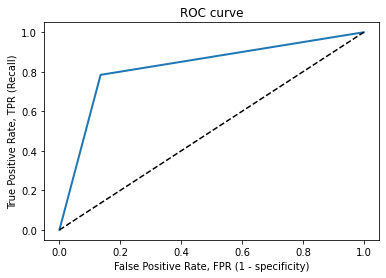

Площадь под ROC кривой: 0.825


In [94]:
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_pred.astype(int))
def plot_roc_curve(fpr, tpr, label=None):
     plt.plot(fpr, tpr, linewidth=2, label=label)
     plt.plot([0, 1],[0, 1], 'k--') # dashed diagonal
     plt.xlabel('False Positive Rate, FPR (1 - specificity)')
     plt.ylabel('True Positive Rate, TPR (Recall)')
     plt.title('ROC curve')
plot_roc_curve(fpr, tpr)
plt.show()
print('Площадь под ROC кривой: {:.3f}'.format(roc_auc_score(y_test.astype(int), y_pred.astype(int))))